In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import probplot, norm, t
import seaborn as sns
sns.set(rc={'figure.figsize':(100,10)})
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [21]:
data = pd.read_csv('steam_processada_parcial.csv')

In [22]:
#colunas = ['positive_ratings', 'negative_ratings', 'price']
colunas = ['price', 'positive_ratings']

In [23]:
data.loc[:, colunas].head()

,price,positive_ratings
0,7.19,124534
1,3.99,3318
2,3.99,3416
3,3.99,1273
4,3.99,5250


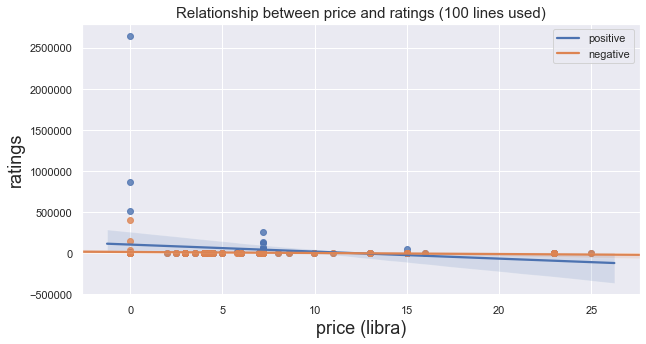

In [24]:
#simple regress with seaborn
sns.set(color_codes=True)
#sns.regplot(x="price", y="positive_ratings", data = data[:30]);
sns.set(rc={'figure.figsize':(10,5)})
sns.regplot(x="price", y="positive_ratings", data = data[:100]);
sns.regplot(x="price", y="negative_ratings", data = data[:100]);


plt.legend(labels=['positive','negative'])
plt.title('Relationship between price and ratings (100 lines used)', size=15)
plt.xlabel('price (libra)', size=18)
plt.ylabel('ratings', size=18);


In [25]:
#beta^0 e beta^1
df =  pd.read_csv('steam_processada_parcial.csv')
x = df['price']# pegar somente 30 linhas
y = df['positive_ratings']

yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))

beta0: 471.32611908127353
beta1: 87.07067856993659


In [26]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

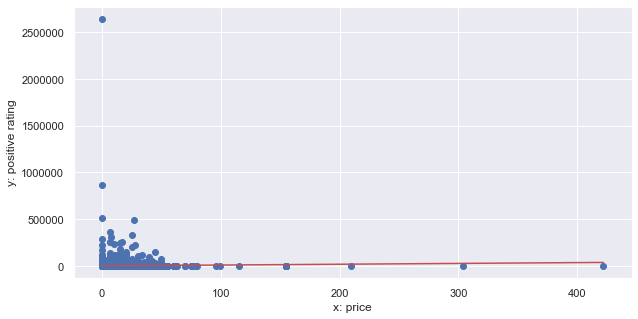

In [27]:
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: price");
plt.ylabel("y: positive rating");

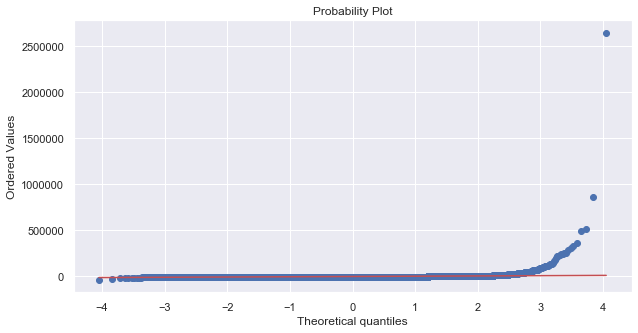

In [28]:
e = y - (b0 + b1*x) # Escreva sua fórmula dos resíduos aqui

stats.probplot(e, dist='norm', plot=plt); # Verifique graficamente  se é uma normal - como fazer isso?

In [29]:
import statsmodels.api as sm # Importe da biblioteca

x = df['price'] # Definindo renda como explicativa
y = df['positive_ratings']    # Definindo CO2 como resposta

xc = sm.add_constant(x) # Adiciona coluna de 1s para estimar intercepto
model = sm.OLS(y,xc)    # Define o modelo
results = model.fit()   # Faz o ajuste
results.summary()       # Mostra os resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       positive_ratings   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     35.35
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           2.79e-09
Time:                        08:28:38   Log-Likelihood:            -3.0513e+05
No. Observations:               27075   AIC:                         6.103e+05
Df Residuals:                   27073   BIC:                         6.103e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        471.3261    145.687      3.235      0.001     185.772     756.880
price         87.0707     14.645      5.945      0.000      58.365     115.776
==============================================================================
Omnibus:                   109697.248   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     225381231601.452
Skew:                         106.361   Prob(JB):                         0.00
Kurtosis:                   14135.893   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

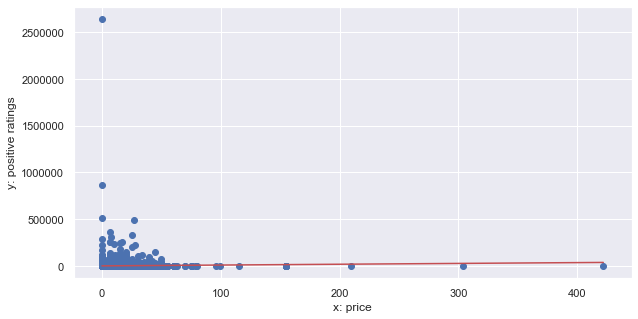

In [30]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);
plt.xlabel("x: price");
plt.ylabel("y: positive ratings");

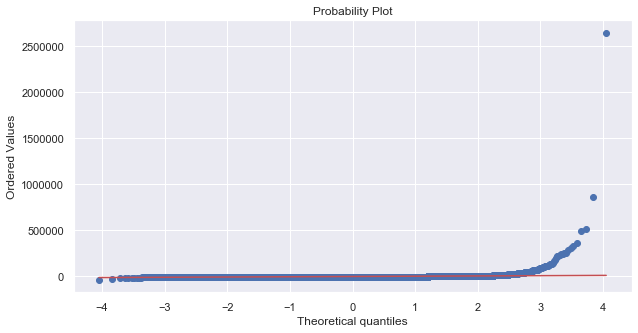

In [31]:
stats.probplot(results.resid, dist="norm", plot=plt);

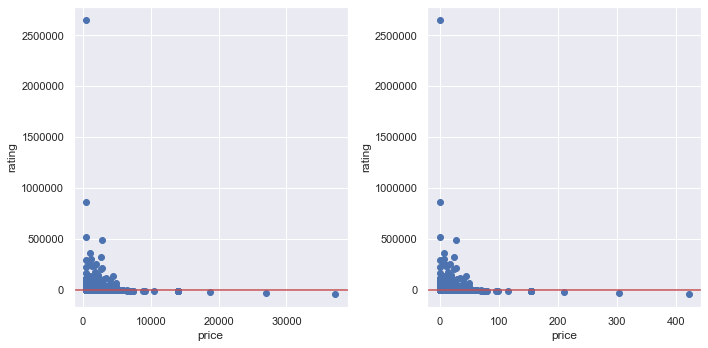

In [32]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(results.predict(xc),results.resid); #xc contem matriz de planejamento usada no ajuste OLS 
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.subplot(122)
plt.scatter(x,results.resid); #x contem apenas a variável independente utilizada no ajuste linear
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.tight_layout()
plt.show()

In [33]:
#beta^0 e beta^1
df =  pd.read_csv('steam_processada_parcial.csv')
x = df['price']# pegar somente 30 linhas
y = df['negative_ratings']

yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))

beta0: 41.49947809720945
beta1: 27.891128836445176


In [34]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

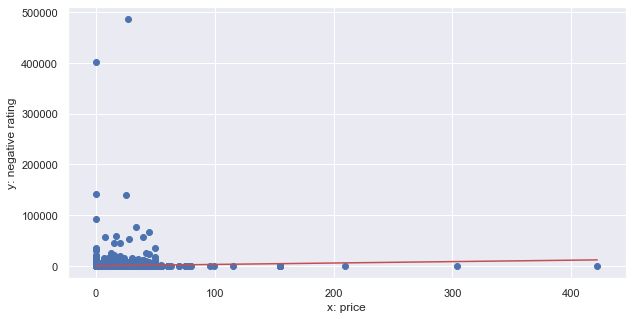

In [35]:
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: price");
plt.ylabel("y: negative rating");

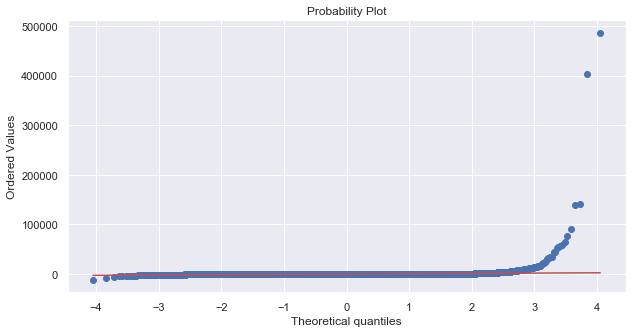

In [36]:
e = y - (b0 + b1*x) # Escreva sua fórmula dos resíduos aqui

stats.probplot(e, dist='norm', plot=plt); # Verifique graficamente  se é uma normal - como fazer isso?

In [37]:
x = df['price'] # Definindo renda como explicativa
y = df['negative_ratings']    # Definindo CO2 como resposta

xc = sm.add_constant(x) # Adiciona coluna de 1s para estimar intercepto
model = sm.OLS(y,xc)    # Define o modelo
results = model.fit()   # Faz o ajuste
results.summary()       # Mostra os resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       negative_ratings   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     71.32
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           3.19e-17
Time:                        08:28:44   Log-Likelihood:            -2.6481e+05
No. Observations:               27075   AIC:                         5.296e+05
Df Residuals:                   27073   BIC:                         5.296e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4995     32.853      1.263      0.207     -22.895     105.894
price         27.8911      3.303      8.445      0.000      21.418      34.364
==============================================================================
Omnibus:                   103499.078   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      94397338898.114
Skew:                          88.788   Prob(JB):                         0.00
Kurtosis:                    9148.752   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

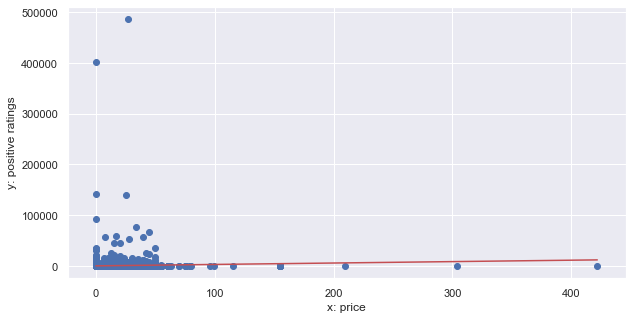

In [38]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);
plt.xlabel("x: price");
plt.ylabel("y: positive ratings");

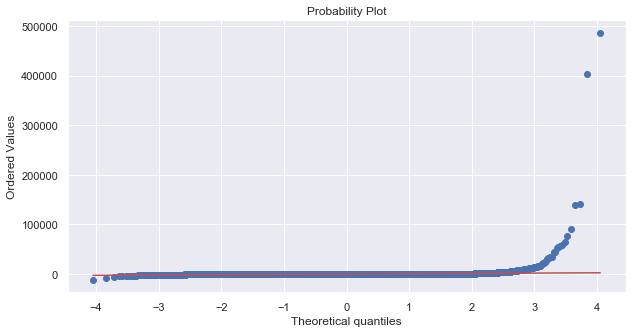

In [39]:
stats.probplot(results.resid, dist="norm", plot=plt);

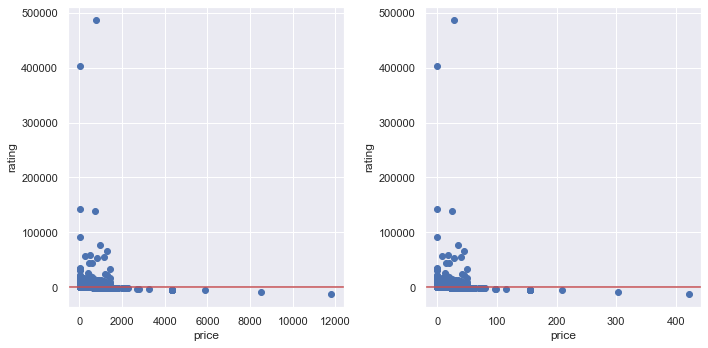

In [40]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(results.predict(xc),results.resid); #xc contem matriz de planejamento usada no ajuste OLS 
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.subplot(122)
plt.scatter(x,results.resid); #x contem apenas a variável independente utilizada no ajuste linear
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.tight_layout()
plt.show()

# Regresão Multipla

In [47]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [48]:
data.columns

Index(['Unnamed: 0', 'name', 'english', 'developer', 'publisher',
       'required_age', 'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime',
       ...
       'god game', 'top-down', 'character customization',
       'real-time with pause', 'bikes', 'survival', 'underwater', '1980s',
       'time management', 'mystery dungeon'],
      dtype='object', length=387)

In [49]:
data.describe()

,Unnamed: 0,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners min,...,god game,top-down,character customization,real-time with pause,bikes,survival,underwater,1980s,time management,mystery dungeon
count,27075.000000,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000,2.707500e+04,...,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000
mean,13537.000000,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193,8.012669e+04,...,0.000369,0.001810,0.000517,0.000111,0.000222,0.010526,0.000480,0.000222,0.001219,0.000037
std,7816.023605,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922,8.708977e+05,...,0.019215,0.042504,0.022734,0.010526,0.014885,0.102058,0.021907,0.014885,0.034891,0.006077
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6768.500000,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13537.000000,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20305.500000,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000,2.000000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27074.000000,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000,1.000000e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
Y = data['price']
lista_x = list(data.columns)
lista_x.remove("Unnamed: 0")
lista_x.remove("price")
lista_x.remove("developer")
lista_x.remove("publisher")
lista_x.remove("name")
X=data[lista_x]
X.head()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners min,owners max,release_year,...,god game,top-down,character customization,real-time with pause,bikes,survival,underwater,1980s,time management,mystery dungeon
0,1,0,0,124534,3339,17612,317,10000000,20000000,2000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,3318,633,277,62,5000000,10000000,1999,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,3416,398,187,34,5000000,10000000,2003,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1273,267,258,184,5000000,10000000,2001,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,5250,288,624,415,5000000,10000000,1999,...,0,0,0,0,0,0,0,0,0,0


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [91]:
results = regress(X_train,Y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     25.44
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:12:57   Log-Likelihood:                -72247.
No. Observations:               21660   AIC:                         1.452e+05
Df Residuals:                   21283   BIC:                         1.483e+05
Df Model:                         376                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -555.4518     55.943     -9.929      0.000    -665.104    -445.800
english                              -0.0432      0.357     -0.121      0.904      -0.743       0.656
required_age                          0.1941      0.021      9.440      0.000       0.154       0.234
achievements                       9.143e-05      0.000      0.683      0.495      -0.000       0.000
positive_ratings                  -7.284e-06   3.89e-06     -1.874      0.061   -1.49e-05    3.36e-07
negative_ratings                      0.0001    2.1e-05      6.358      0.000    9.25e-05       0.000
average_playtime                   6.694e-05   6.39e-05      1.047      0.295   -5.84e-05       0.000
median_playtime                    2.694e-05   4.81e-05      0.560      0.576   -6.74e-05       0.000
owners min                        -2.084e-06   9.07e-07     -2.296      0.022   -3.86e-06   -3.05e-07
owners max                         7.015e-07   4.03e-07      1.739      0.082   -8.92e-08    1.49e-06
release_year                          0.2763      0.028      9.986      0.000       0.222       0.331
release_month                         0.0392      0.014      2.821      0.005       0.012       0.066
release_day                           0.0115      0.005      2.164      0.030       0.001       0.022
mac                                   0.3367      0.136      2.467      0.014       0.069       0.604
windows                               1.8764      3.081      0.609      0.542      -4.162       7.915
linux                                -0.5072      0.158     -3.220      0.001      -0.816      -0.198
co-op                                 0.9081      0.311      2.924      0.003       0.299       1.517
steam trading cards                   0.6506      0.120      5.432      0.000       0.416       0.885
shared/split screen                   0.0215      0.239      0.090      0.928      -0.446       0.489
stats                                -0.4743      0.201     -2.365      0.018      -0.867      -0.081
mods                                 -3.2274      5.128     -0.629      0.529     -13.278       6.824
steam leaderboards                   -0.1185      0.162     -0.729      0.466      -0.437       0.200
partial controller support            0.7386      0.143      5.164      0.000       0.458       1.019
valve anti-cheat enabled              4.3490      0.918      4.735      0.000       2.549       6.149
mmo                                  -0.0381      0.548     -0.070      0.945      -1.112       1.035
steam cloud                           1.6428      0.124     13.262      0.000       1.400       1.886
includes source sdk                   0.0023      1.408      0.002      0.999      -2.757       2.762
full controller support

In [97]:
X_test.shape

(5415, 382)

In [101]:
X_test_const = sm.add_constant(X_test)
X_test_const["const"]=1
X_test_const.head()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners min,owners max,release_year,...,top-down,character customization,real-time with pause,bikes,survival,underwater,1980s,time management,mystery dungeon,const
151,1,0,0,575,55,801,801,100000,200000,2009,...,0,0,0,0,0,0,0,0,0,1
16974,1,0,1,14,13,0,0,0,20000,2017,...,0,0,0,0,0,0,0,0,0,1
11436,1,0,9,19,15,0,0,0,20000,2016,...,0,0,0,0,0,0,0,0,0,1
16469,1,0,0,2,0,0,0,0,20000,2017,...,0,0,0,0,0,0,0,0,0,1
759,1,0,47,5336,903,1834,2894,1000000,2000000,2010,...,0,0,0,0,0,0,0,0,0,1


In [103]:
y_pred = results.predict(X_test_const)


In [105]:
from sklearn.metrics import mean_squared_error
print('Acurácia: {}'.format(mean_squared_error(Y_test, y_pred)))

Acurácia: 287886.9963673384


In [106]:

from sklearn.metrics import r2_score
print('Acurácia: {}'.format(r2_score(Y_test, y_pred)))

Acurácia: -6831.413665165799


In [108]:
from sklearn.metrics import mean_absolute_error
print('Acurácia: {}'.format(mean_absolute_error(Y_test, y_pred)))

Acurácia: 530.2146439830018


In [110]:
from sklearn.metrics import median_absolute_error
print('Acurácia: {}'.format(median_absolute_error(Y_test, y_pred)))

Acurácia: 543.9951796077721
